# Make Figures for Main Manuscript

Lauren Khoury  
July 30, 2025

In [ ]:

library(dplyr) |> suppressMessages()
library(skimr)


In [ ]:

d_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_0.csv"))
d_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_03.csv"))
d_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_method_05.csv"))

d_20_covs <- data.table::fread(here::here(rdrive_path, "batch_results_20_covs.csv"))
d_n50 <- data.table::fread(here::here(rdrive_path, "batch_results_n50.csv"))

d2_0 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_0.csv"))
d2_03 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_03.csv"))
d2_05 <- data.table::fread(here::here(rdrive_path, "batch_results_new_20K_05.csv"))

d_wo_x_og <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_og_seed.csv"))
d_wo_x_new <- data.table::fread(here::here(rdrive_path, "batch_results_methods_wo_x_new_seed.csv"))


In [ ]:

d_0 <- rbind(d_0, d_20_covs |> filter(b_x == 0))
d_03 <- rbind(d_03, d_20_covs |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_20_covs |> filter(b_x == 0.5))

d_0 <- rbind(d_0, d_n50 |> filter(b_x == 0))
d_03 <- rbind(d_03, d_n50 |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_n50 |> filter(b_x == 0.5))

d_0 <- rbind(d_0, d2_0)
d_03 <- rbind(d_03, d2_03)
d_05 <- rbind(d_05, d2_05)

d_0 <- rbind(d_0, d_wo_x_og |> filter(b_x == 0))
d_0 <- rbind(d_0, d_wo_x_new |> filter(b_x == 0))
d_03 <- rbind(d_03, d_wo_x_og |> filter(b_x == 0.3))
d_03 <- rbind(d_03, d_wo_x_new |> filter(b_x == 0.3))
d_05 <- rbind(d_05, d_wo_x_og |> filter(b_x == 0.5))
d_05 <- rbind(d_05, d_wo_x_new |> filter(b_x == 0.5))


In [ ]:

d_0 <- d_0 |> 
  mutate(method = factor(method, c("no_covs", "all_covs", "p_hacked", "r", "partial_r", 
                                   "full_lm", "full_lm_wo_x", "lasso", "lasso_wo_x")))

d_03 <- d_03 |> 
  mutate(method = factor(method, c("no_covs", "all_covs", "p_hacked", "r", "partial_r", 
                                   "full_lm", "full_lm_wo_x", "lasso", "lasso_wo_x")))

d_05 <- d_05 |> 
  mutate(method = factor(method, c("no_covs", "all_covs", "p_hacked", "r", "partial_r", 
                                   "full_lm", "full_lm_wo_x", "lasso", "lasso_wo_x")))


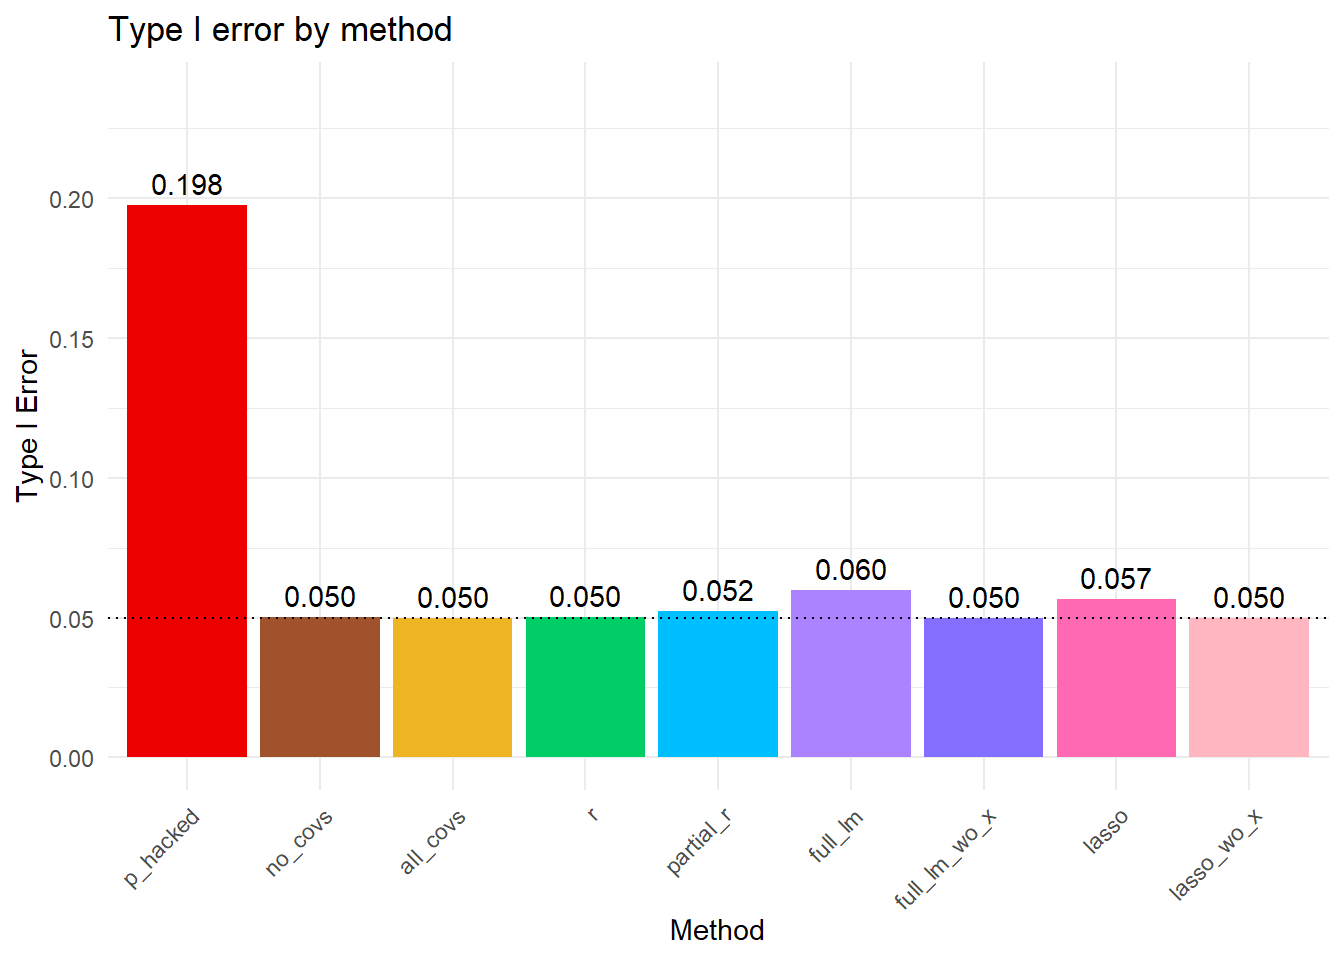

In [ ]:

type_I_summary <- d_0 |>
  group_by(method) |>
  summarise(type_I = mean(p_value < 0.05))

type_I_summary |> 
  mutate(method = fct_relevel(method, "p_hacked")) |>
  ggplot(aes(x = method, y = type_I, fill = method)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  geom_text(aes(label = sprintf("%.3f", type_I)), vjust = -0.5) +
  labs(title = "Type I error by method",
       x = "Method",
       y = "Type I Error",
       fill = "Method") +
  scale_y_continuous(limits = c(0, max(type_I_summary$type_I) * 1.2), 
                     breaks = seq(0, max(type_I_summary$type_I) * 1.2, by = 0.05)) +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = method_colors)


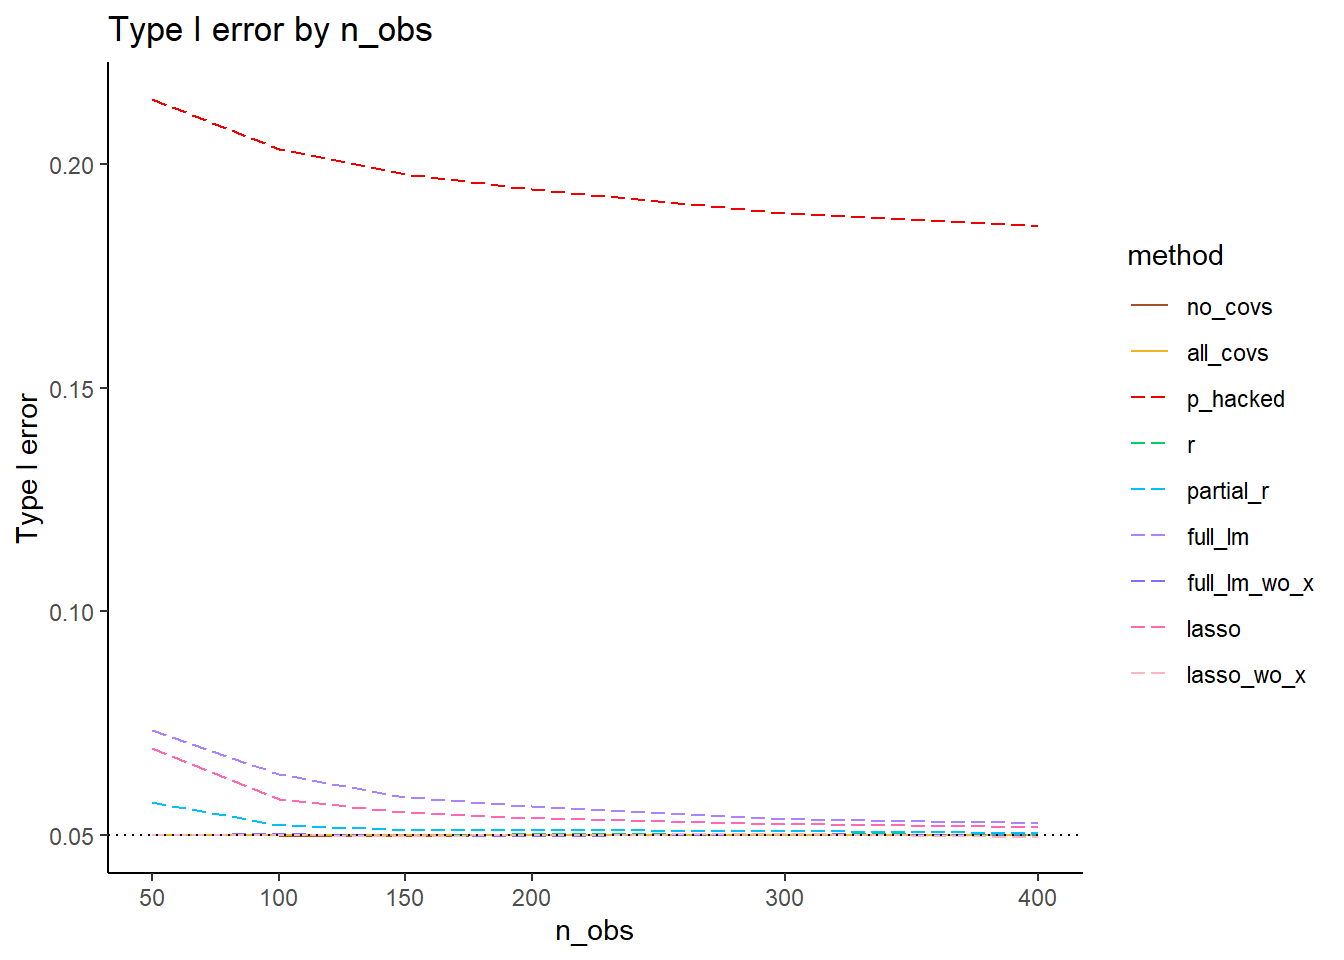

In [ ]:

d_0 |> 
  group_by(method, n_obs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_obs, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(50, 100, 150, 200, 300, 400)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20)) +
  labs(y = "Type I error",
       title = "Type I error by n_obs") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


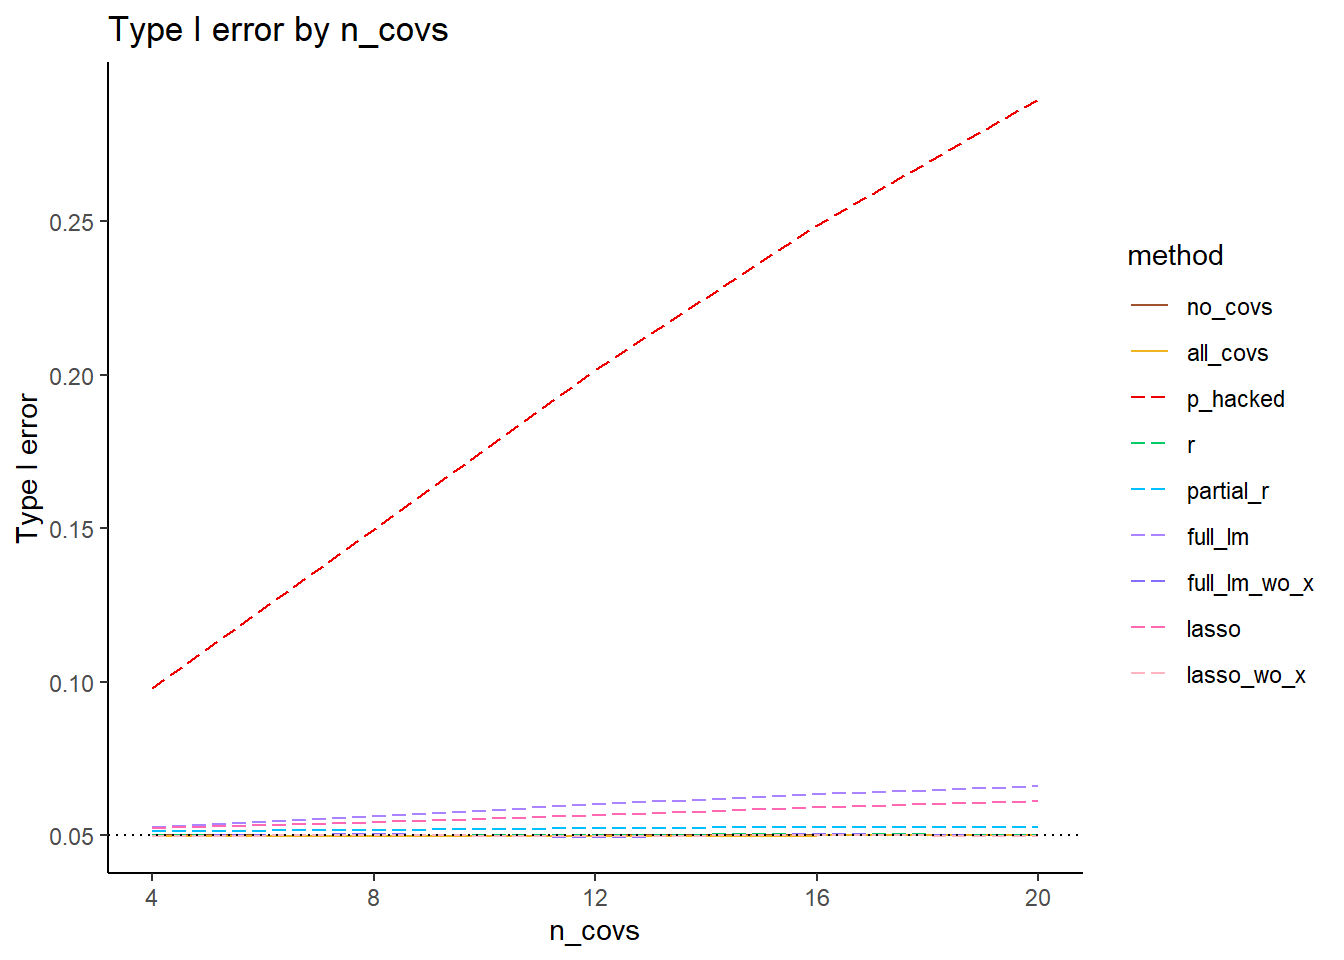

In [ ]:

d_0 |> 
  group_by(method, n_covs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_covs, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(4, 8, 12, 16, 20)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, 0.25)) +
  labs(y = "Type I error",
       title = "Type I error by n_covs") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


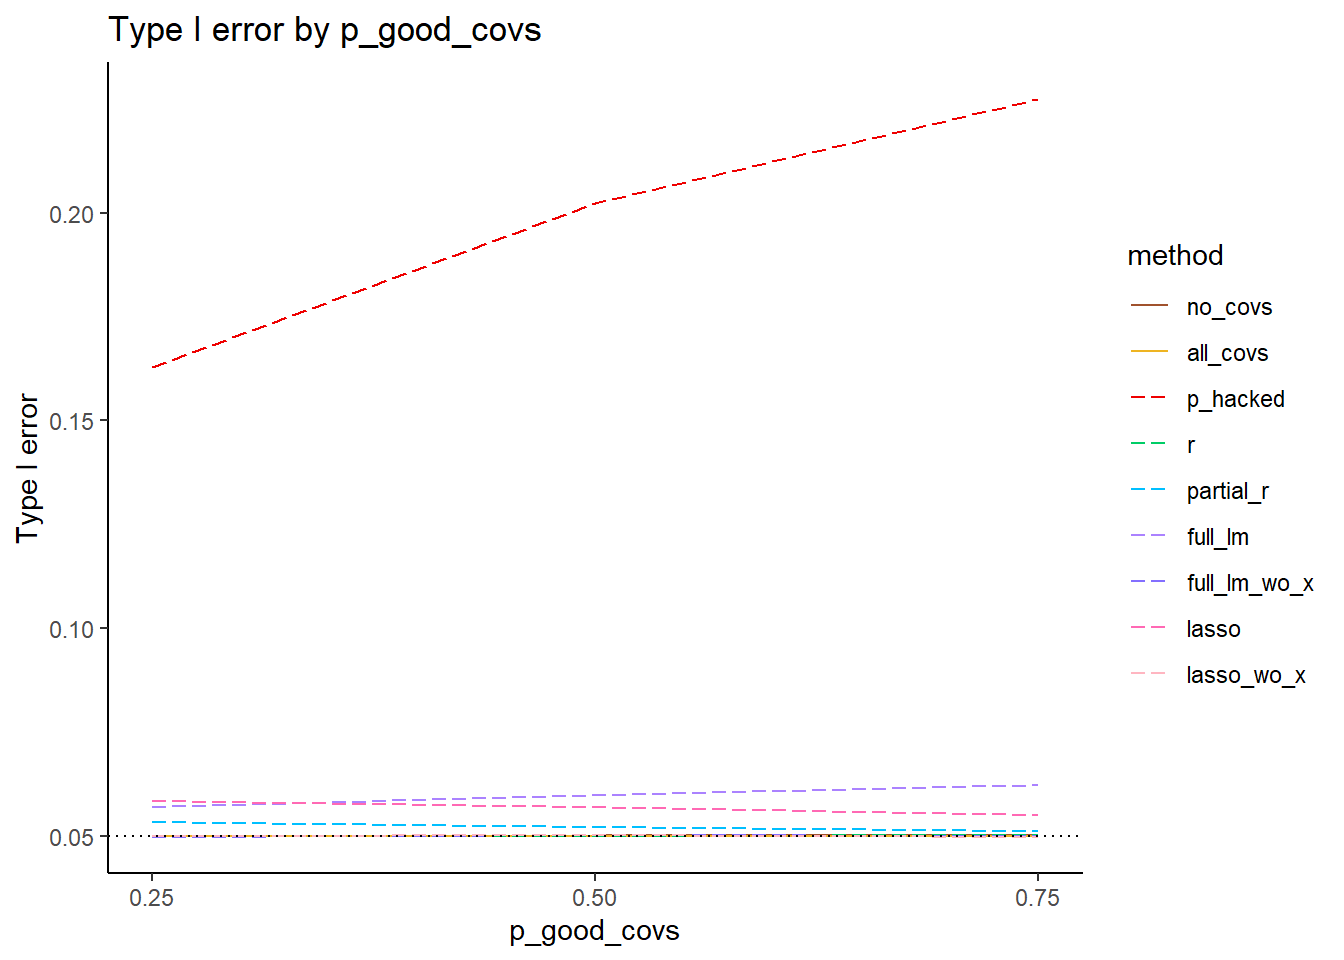

In [ ]:

d_0 |> 
  group_by(method, p_good_covs) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = p_good_covs, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(0.25, 0.50, 0.75)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20)) +
  labs(y = "Type I error",
       title = "Type I error by p_good_covs") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


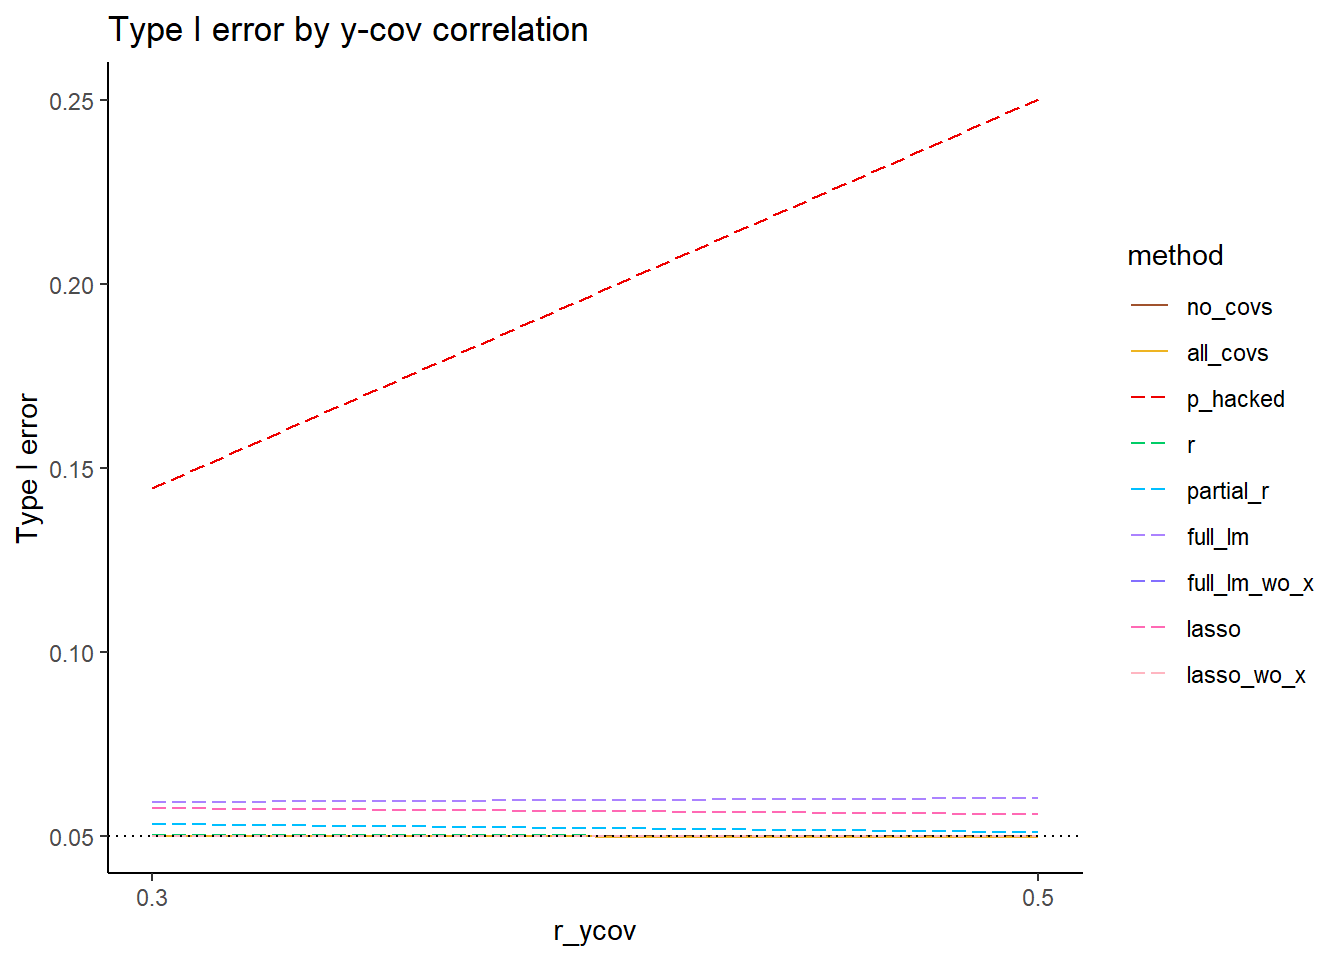

In [ ]:

d_0 |> 
  group_by(method, r_ycov) |> 
  summarise(prop_sig = mean(p_value < 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = r_ycov, y = prop_sig, color = method, linetype = method)) + 
  geom_line() +
  geom_hline(yintercept = 0.05, linetype = "dotted", color = "black") +
  scale_x_continuous(breaks = c(0.3, 0.5)) +
  scale_y_continuous(breaks = c(0.05, 0.10, 0.15, 0.20, 0.25, 0.30)) +
  labs(y = "Type I error",
       title = "Type I error by y-cov correlation") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


(`stat_density()`).

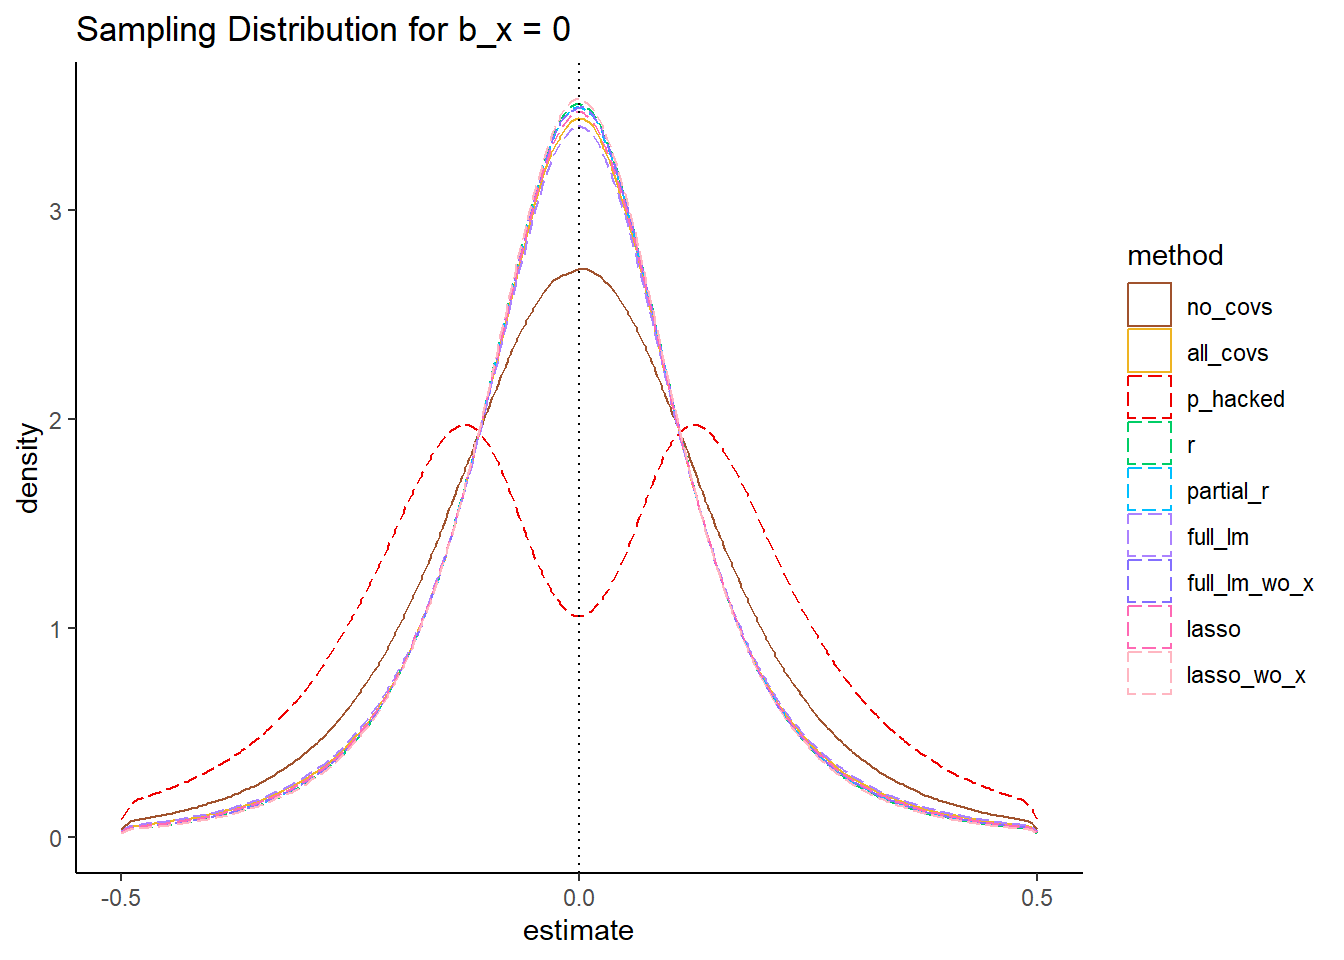

In [ ]:

d_0 |> 
  ggplot(aes(x = estimate, color = method, linetype = method)) +
  geom_density(alpha = 0.5) +
  geom_vline(xintercept = 0, linetype = "dotted", color = "black") +
  scale_x_continuous(limits = c(-0.5, 0.5), breaks = seq(-0.5, 0.5, by = 0.5)) +
  labs(title = "Sampling Distribution for b_x = 0") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


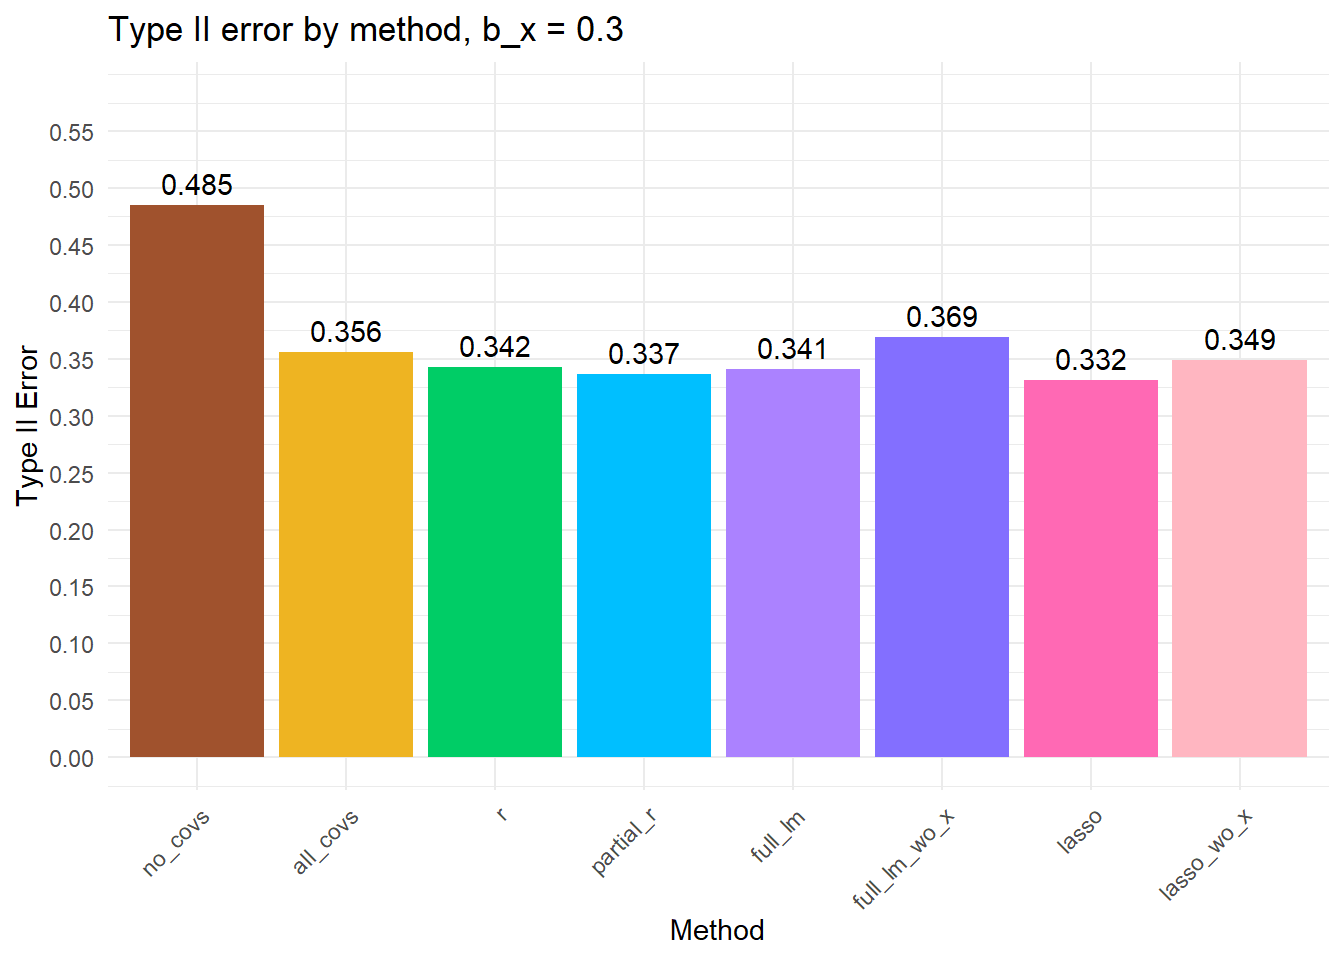

In [ ]:

type_II_summary_03 <- d_03 |>
  filter(method != "p_hacked") |> 
  group_by(method) |>
  summarise(type_II = mean(p_value >= 0.05))

type_II_summary_03 |> 
ggplot(aes(x = method, y = type_II, fill = method)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%.3f", type_II)), vjust = -0.5) +
  labs(title = "Type II error by method, b_x = 0.3",
       x = "Method",
       y = "Type II Error",
       fill = "Method") +
  scale_y_continuous(limits = c(0, max(type_II_summary_03$type_II) * 1.2), 
                     breaks = seq(0, max(type_II_summary_03$type_II) * 1.2, by = 0.05)) +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = method_colors)


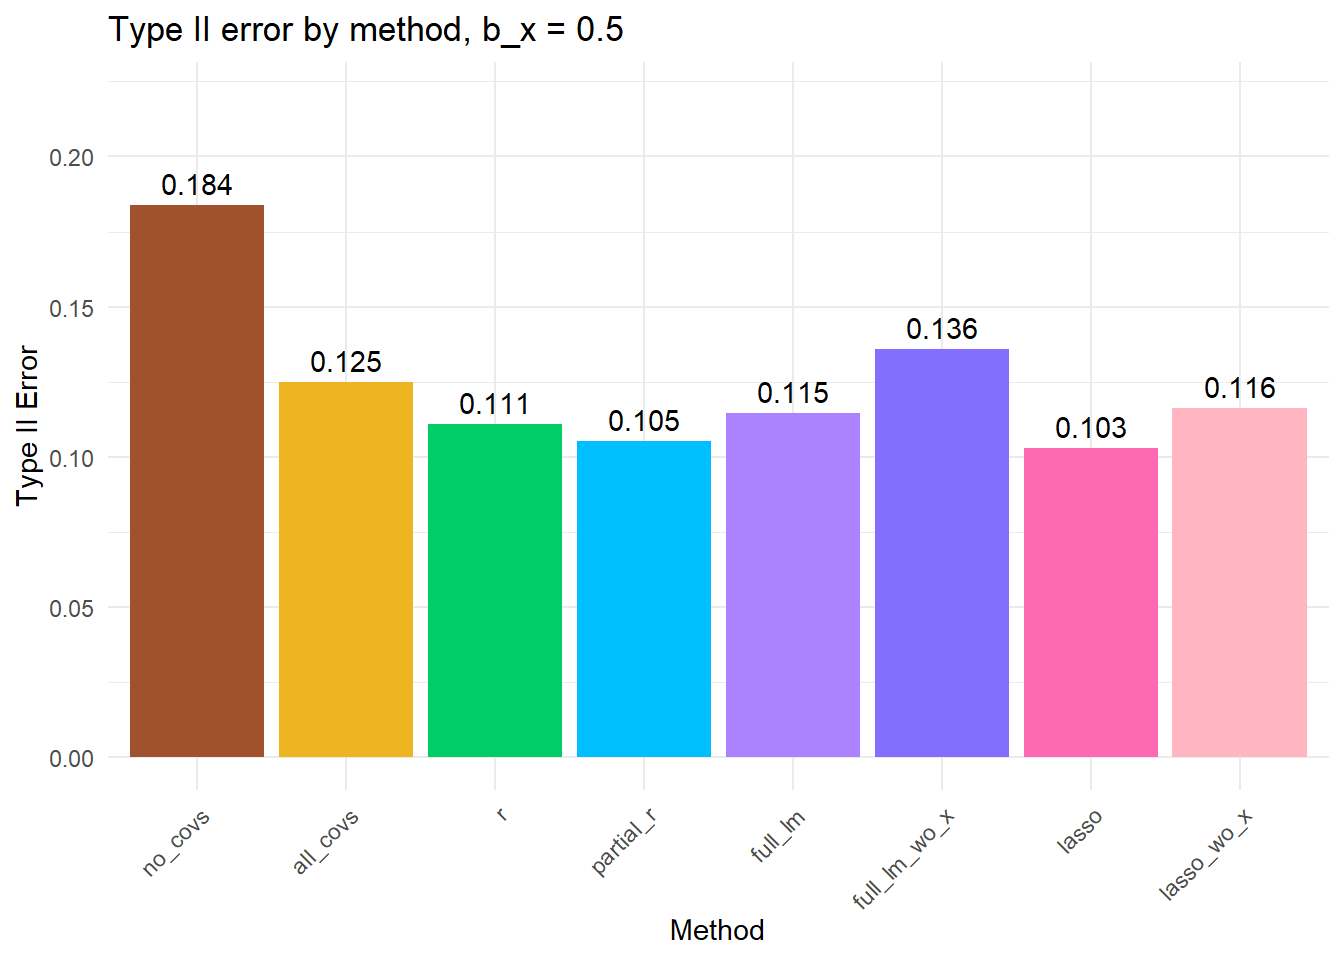

In [ ]:

type_II_summary_05 <- d_05 |>
  filter(method != "p_hacked") |> 
  group_by(method) |>
  summarise(type_II = mean(p_value >= 0.05))

type_II_summary_05 |> 
ggplot(aes(x = method, y = type_II, fill = method)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%.3f", type_II)), vjust = -0.5) +
  labs(title = "Type II error by method, b_x = 0.5",
       x = "Method",
       y = "Type II Error",
       fill = "Method") +
  scale_y_continuous(limits = c(0, max(type_II_summary_05$type_II) * 1.2), 
                     breaks = seq(0, max(type_II_summary_05$type_II) * 1.2, by = 0.05)) +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = method_colors)


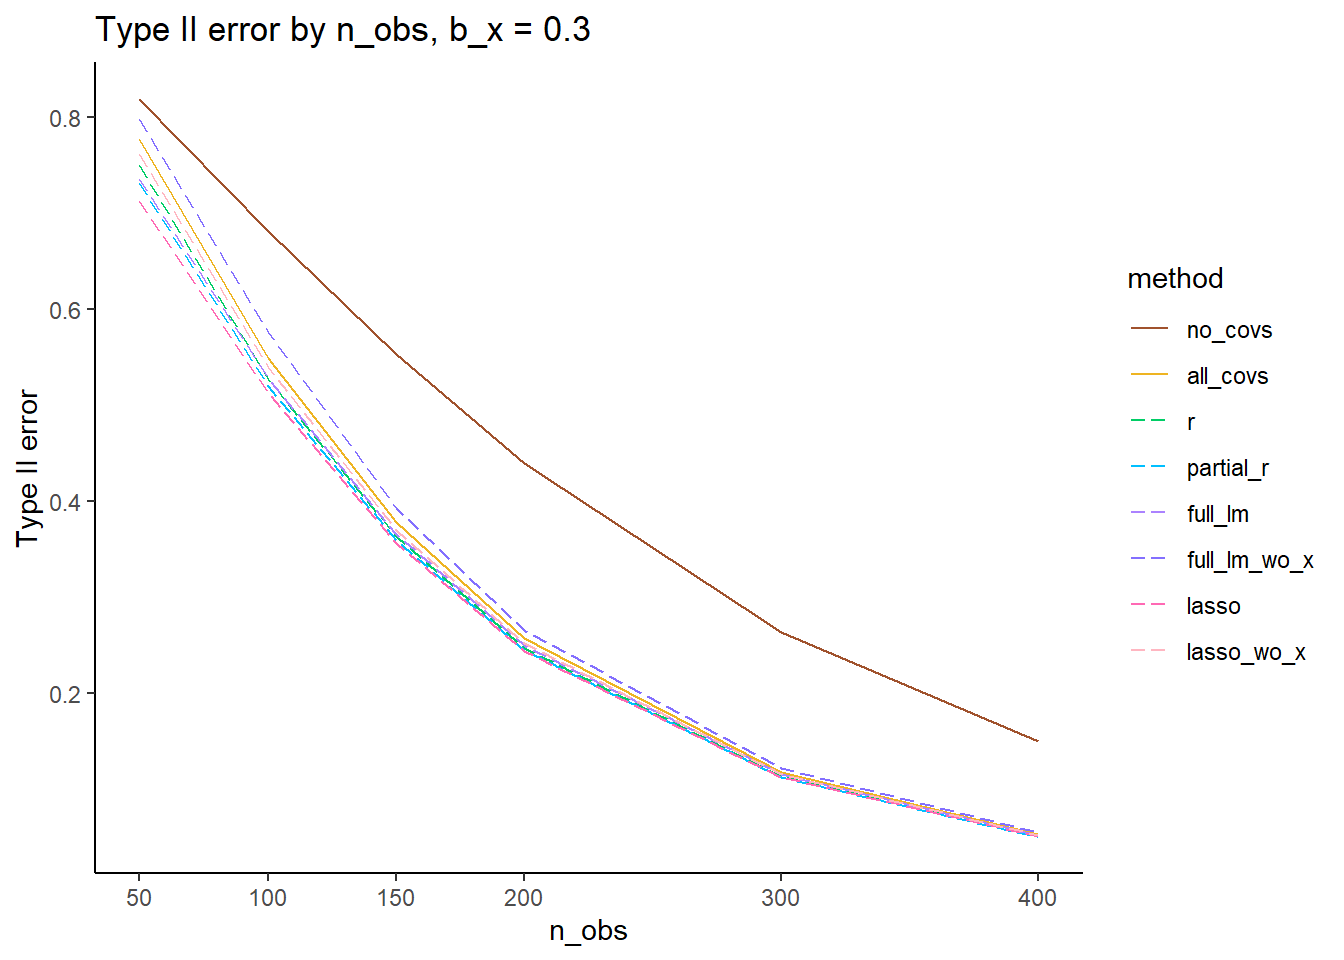

In [ ]:

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_obs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_obs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(50, 100, 150, 200, 300, 400)) +
  labs(y = "Type II error",
       title = "Type II error by n_obs, b_x = 0.3") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


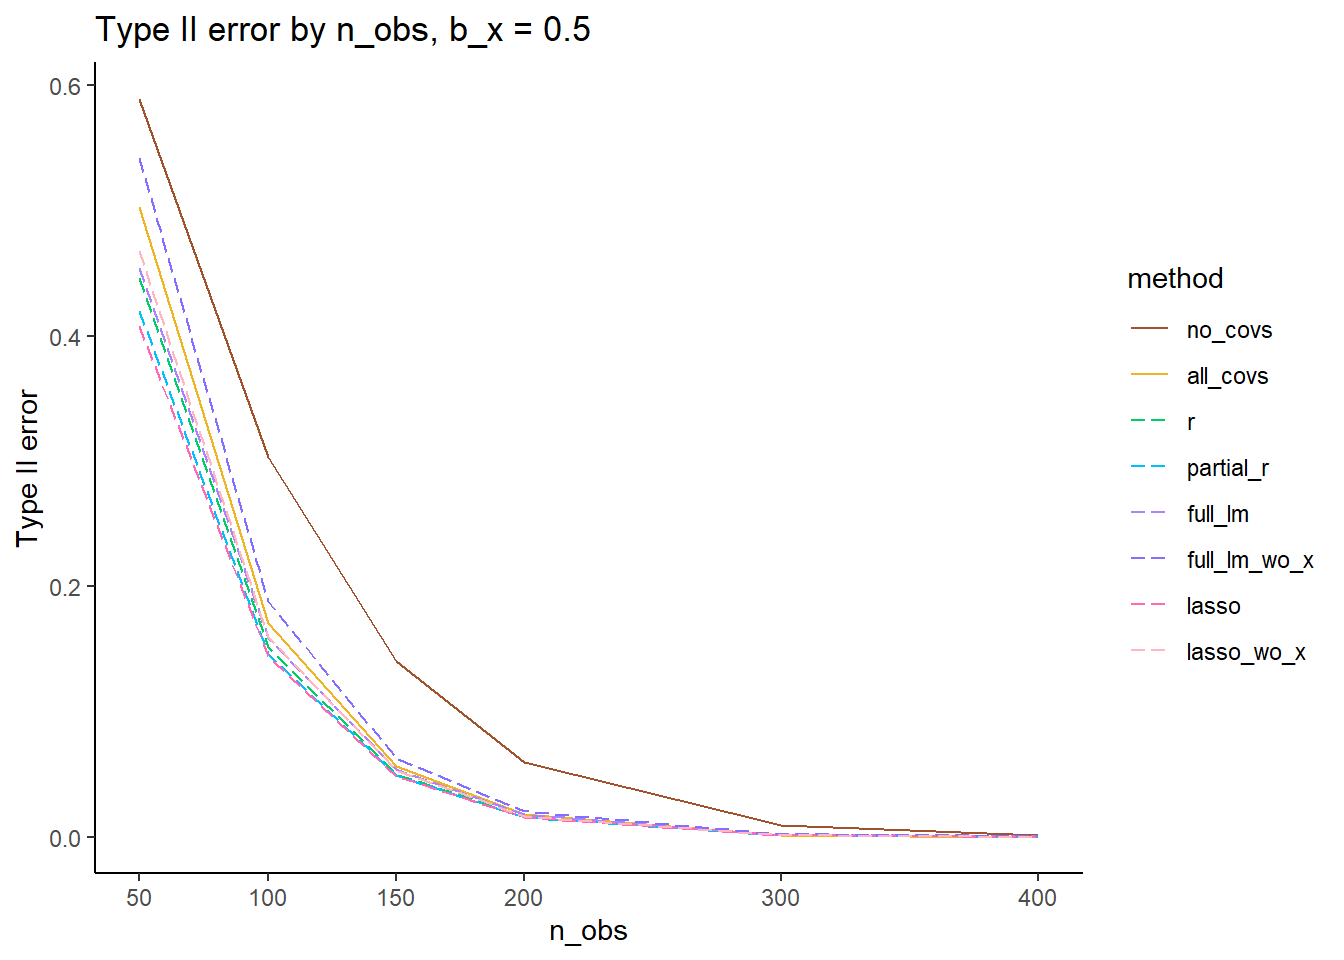

In [ ]:

d_05 |> 
  filter(method != "p_hacked") |>
  group_by(method, n_obs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_obs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(50, 100, 150, 200, 300, 400)) +
  labs(y = "Type II error",
       title = "Type II error by n_obs, b_x = 0.5") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


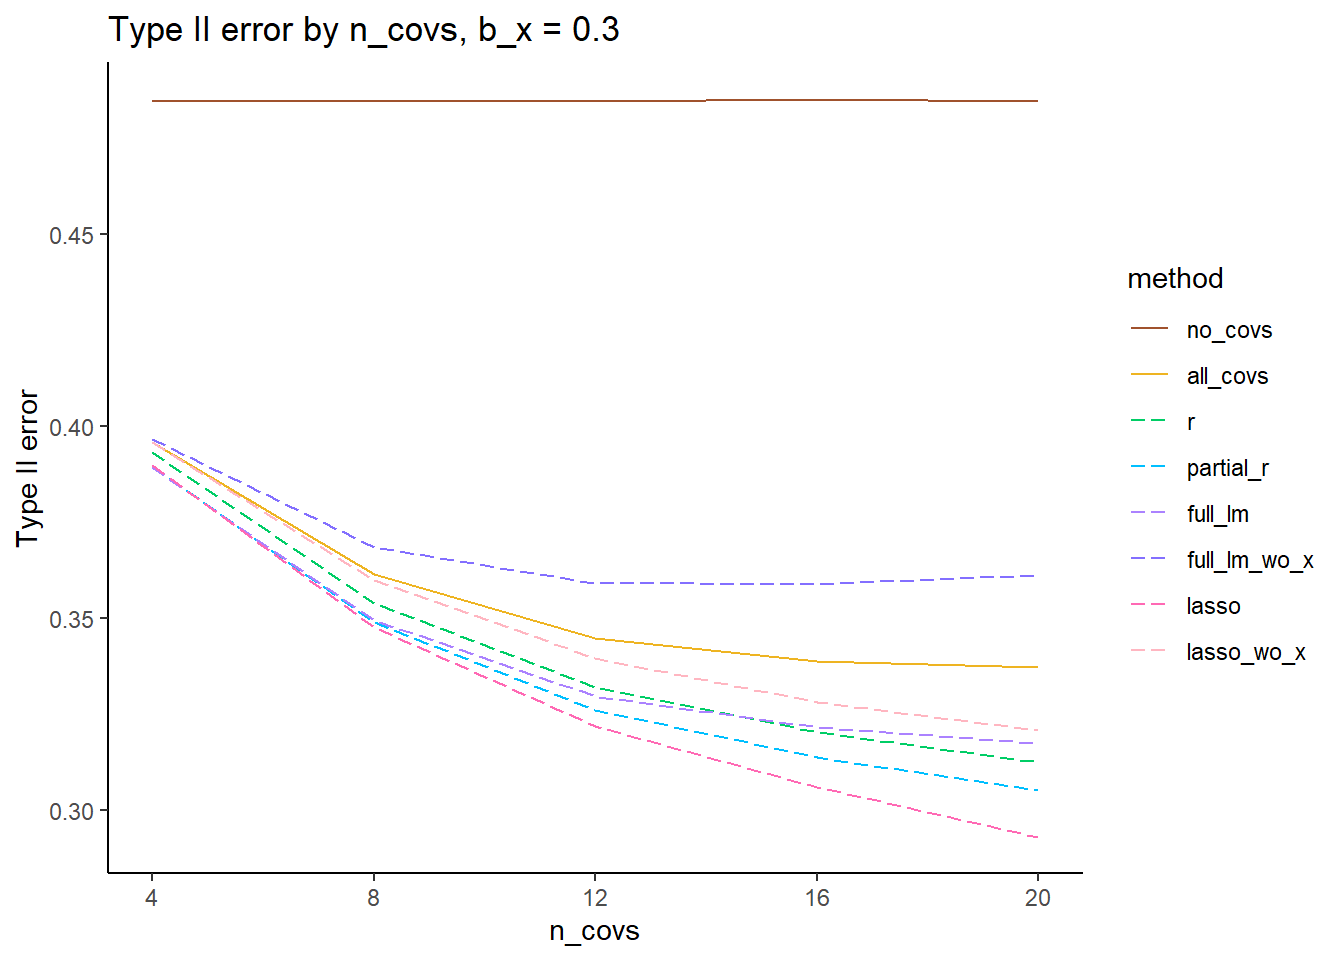

In [ ]:

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_covs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(4, 8, 12, 16, 20)) +
  labs(y = "Type II error",
       title = "Type II error by n_covs, b_x = 0.3") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


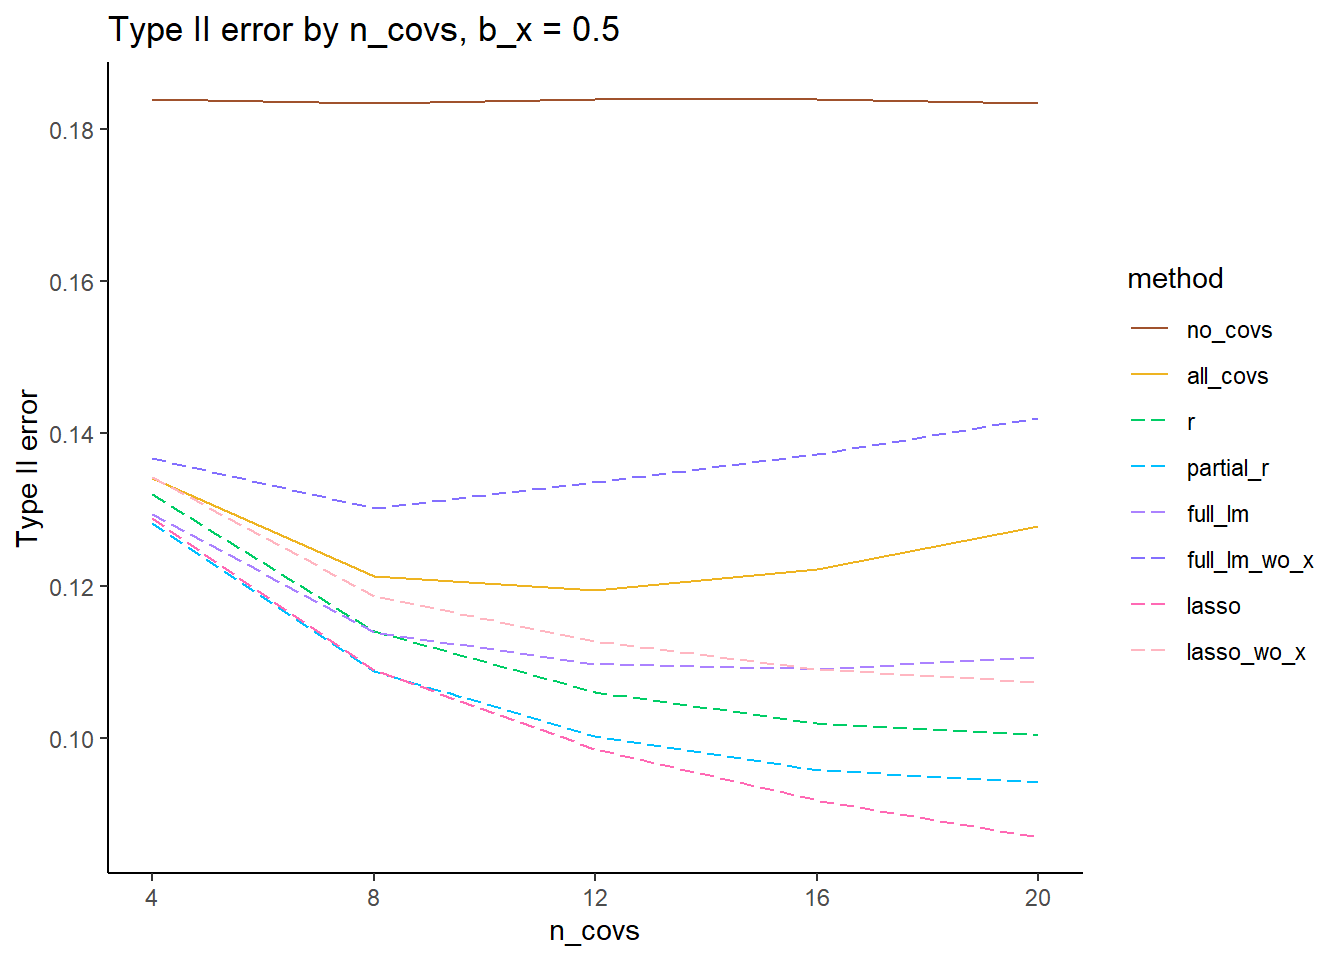

In [ ]:

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method, n_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = n_covs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(4, 8, 12, 16, 20)) +
  labs(y = "Type II error",
       title = "Type II error by n_covs, b_x = 0.5") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


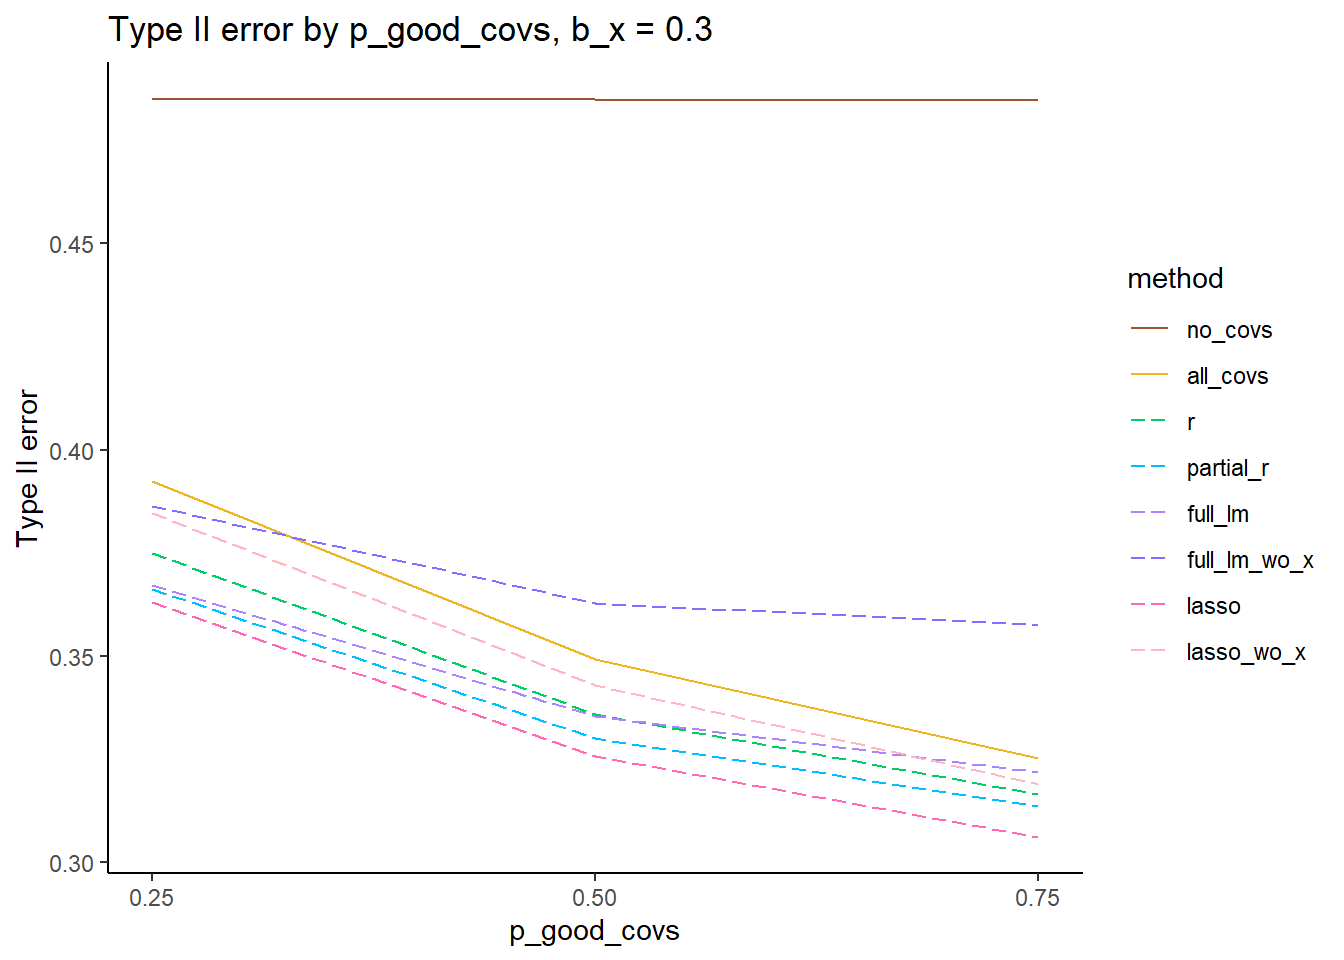

In [ ]:

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, p_good_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = p_good_covs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.25, 0.50, 0.75)) +
  labs(y = "Type II error",
       title = "Type II error by p_good_covs, b_x = 0.3") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


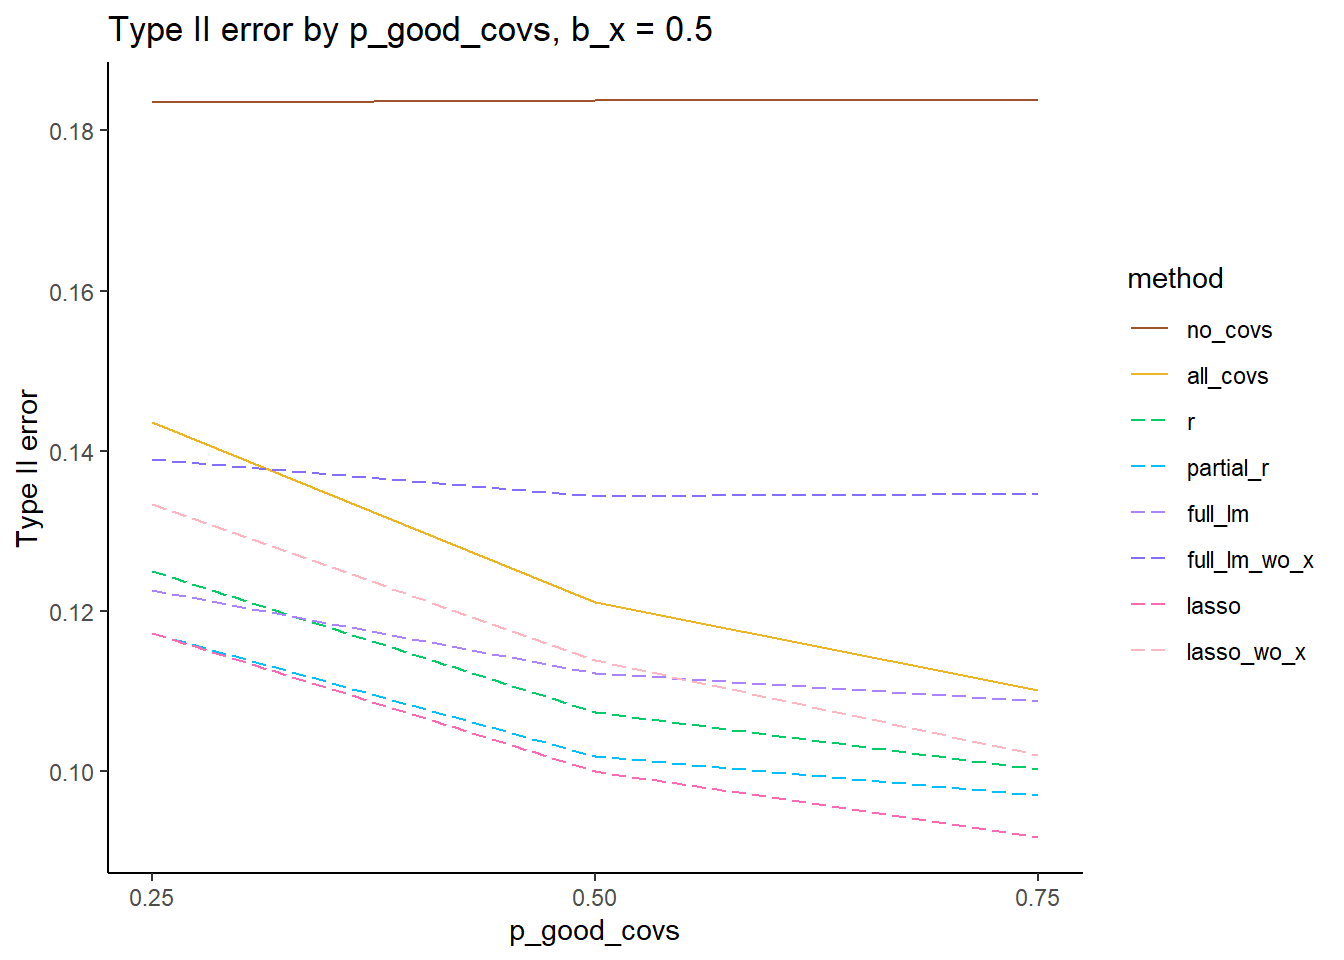

In [ ]:

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method, p_good_covs) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = p_good_covs, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.25, 0.50, 0.75)) +
  labs(y = "Type II error",
       title = "Type II error by p_good_covs, b_x = 0.5") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


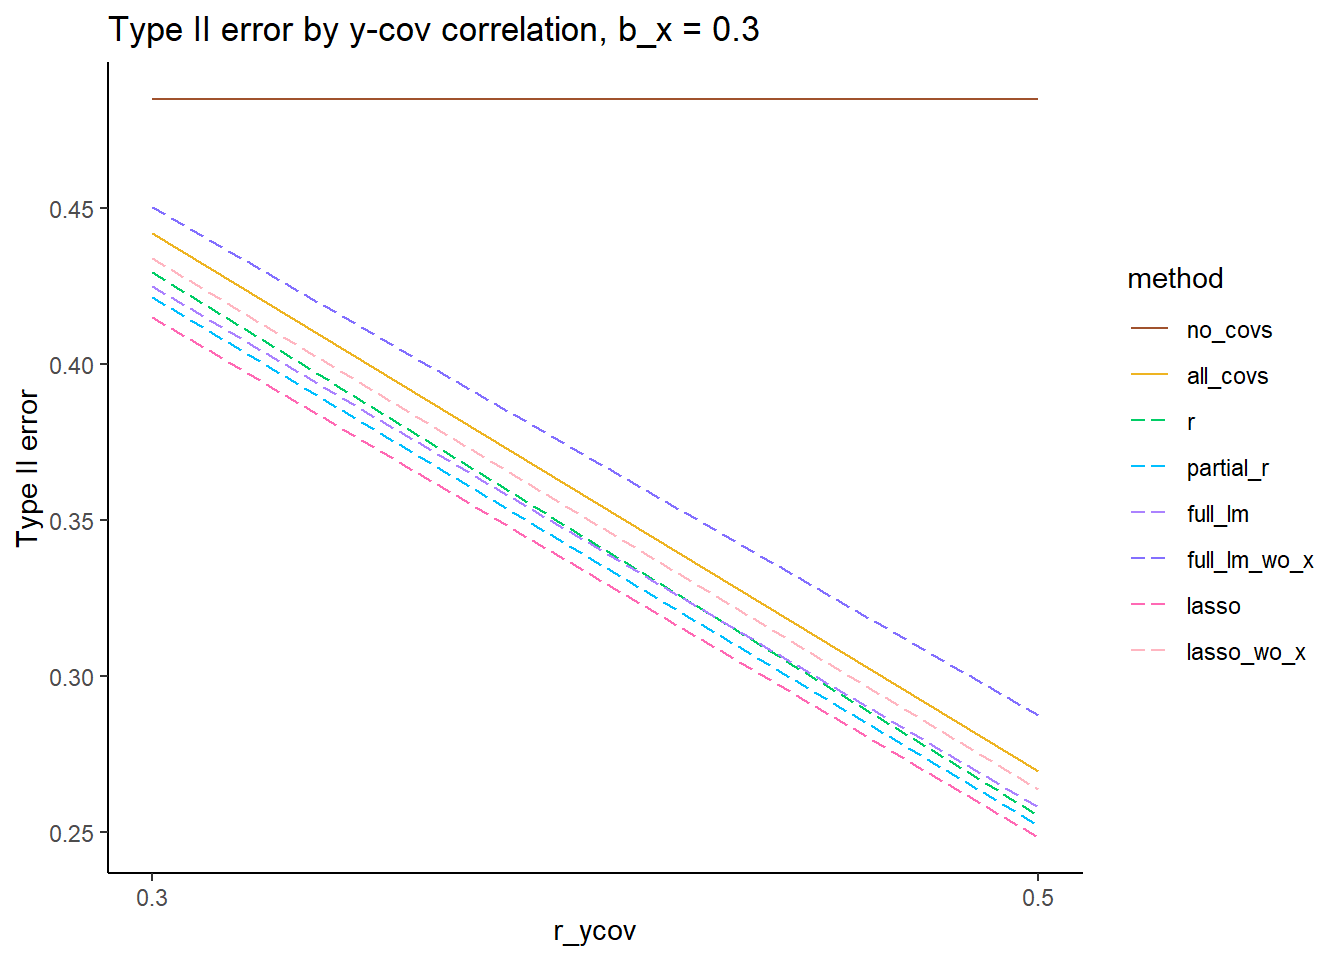

In [ ]:

d_03 |> 
  filter(method != "p_hacked") |> 
  group_by(method, r_ycov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = r_ycov, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.3, 0.5)) +
  labs(y = "Type II error",
       title = "Type II error by y-cov correlation, b_x = 0.3") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


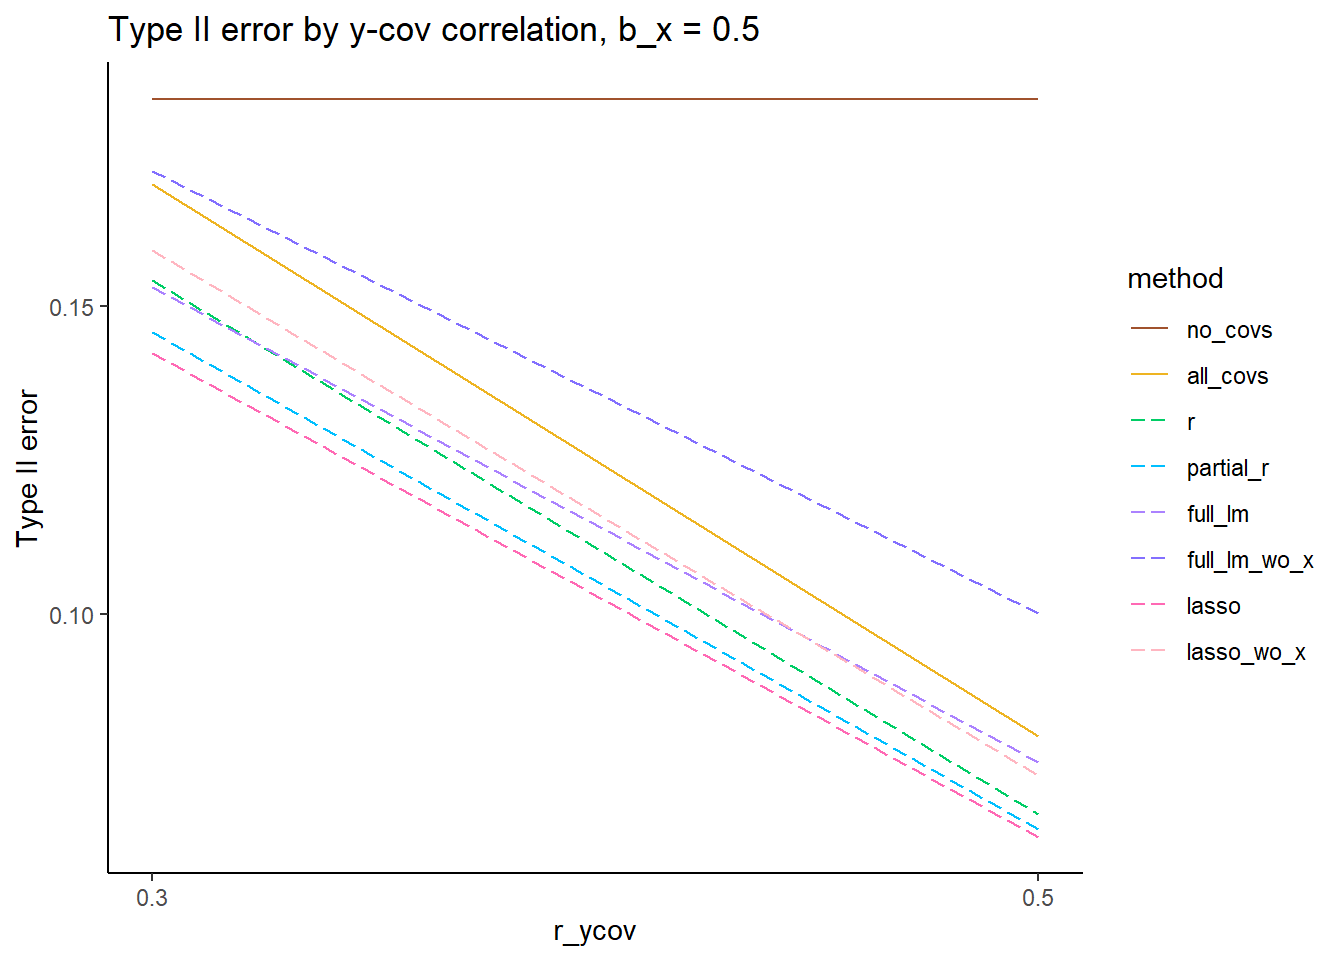

In [ ]:

d_05 |> 
  filter(method != "p_hacked") |> 
  group_by(method, r_ycov) |> 
  summarise(prop_not_sig = mean(p_value >= 0.05),
            .groups = "drop") |> 
  ggplot(aes(x = r_ycov, y = prop_not_sig, color = method, linetype = method)) + 
  geom_line() +
  scale_x_continuous(breaks = c(0.3, 0.5)) +
  labs(y = "Type II error",
       title = "Type II error by y-cov correlation, b_x = 0.5") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


(`stat_density()`).

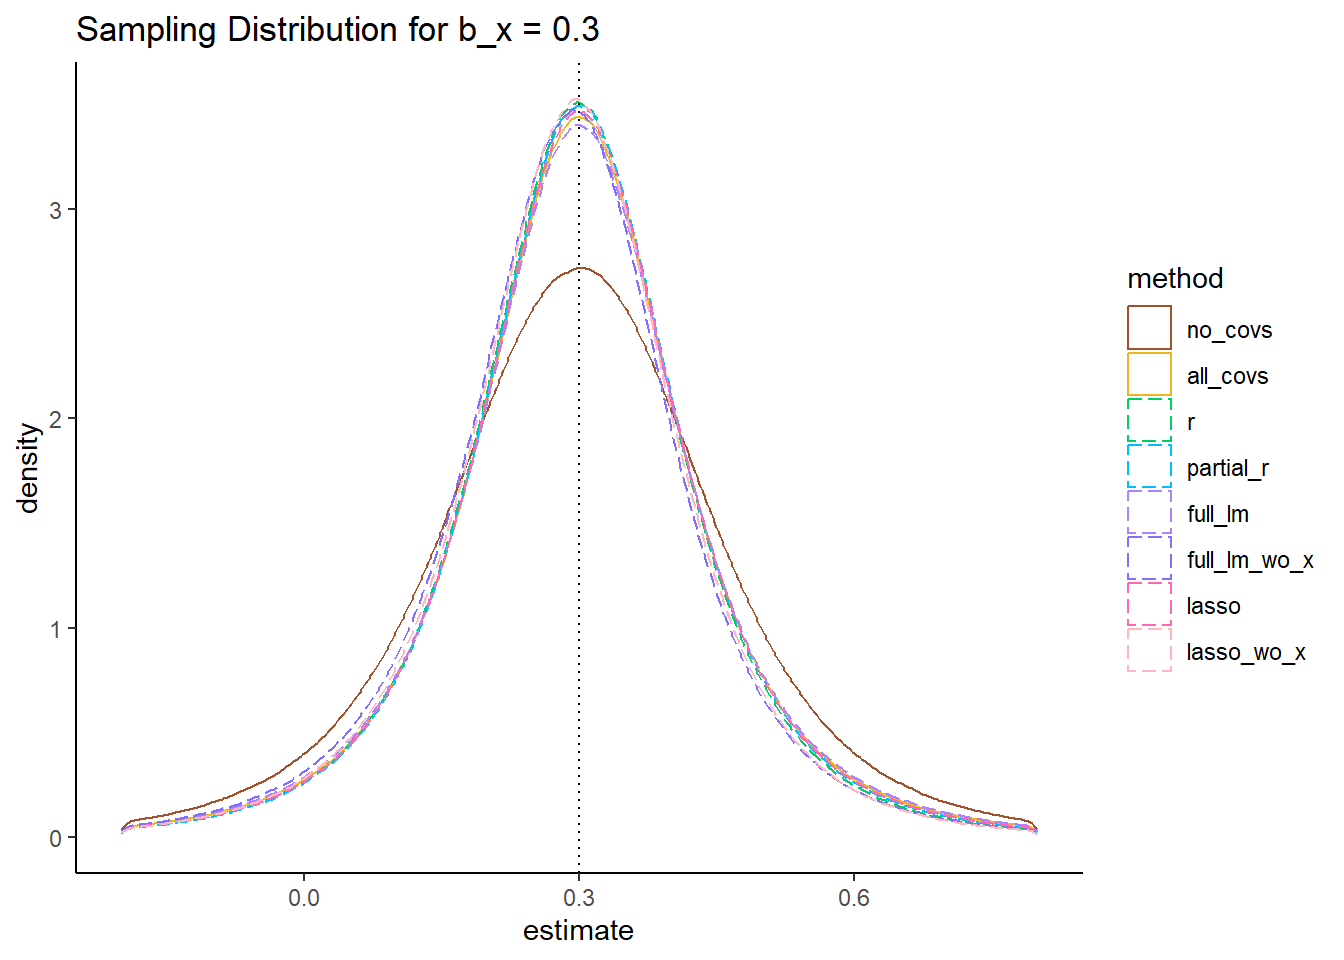

In [ ]:

d_03 |> 
  filter(method != "p_hacked") |> 
  ggplot(aes(x = estimate, color = method, linetype = method)) +
  geom_density(alpha = 0.5) +
  geom_vline(xintercept = 0.3, linetype = "dotted") +
  scale_x_continuous(limits = c(-0.2, 0.8), breaks = c(0, 0.3, 0.6)) +
  labs(title = "Sampling Distribution for b_x = 0.3") +
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)


(`stat_density()`).

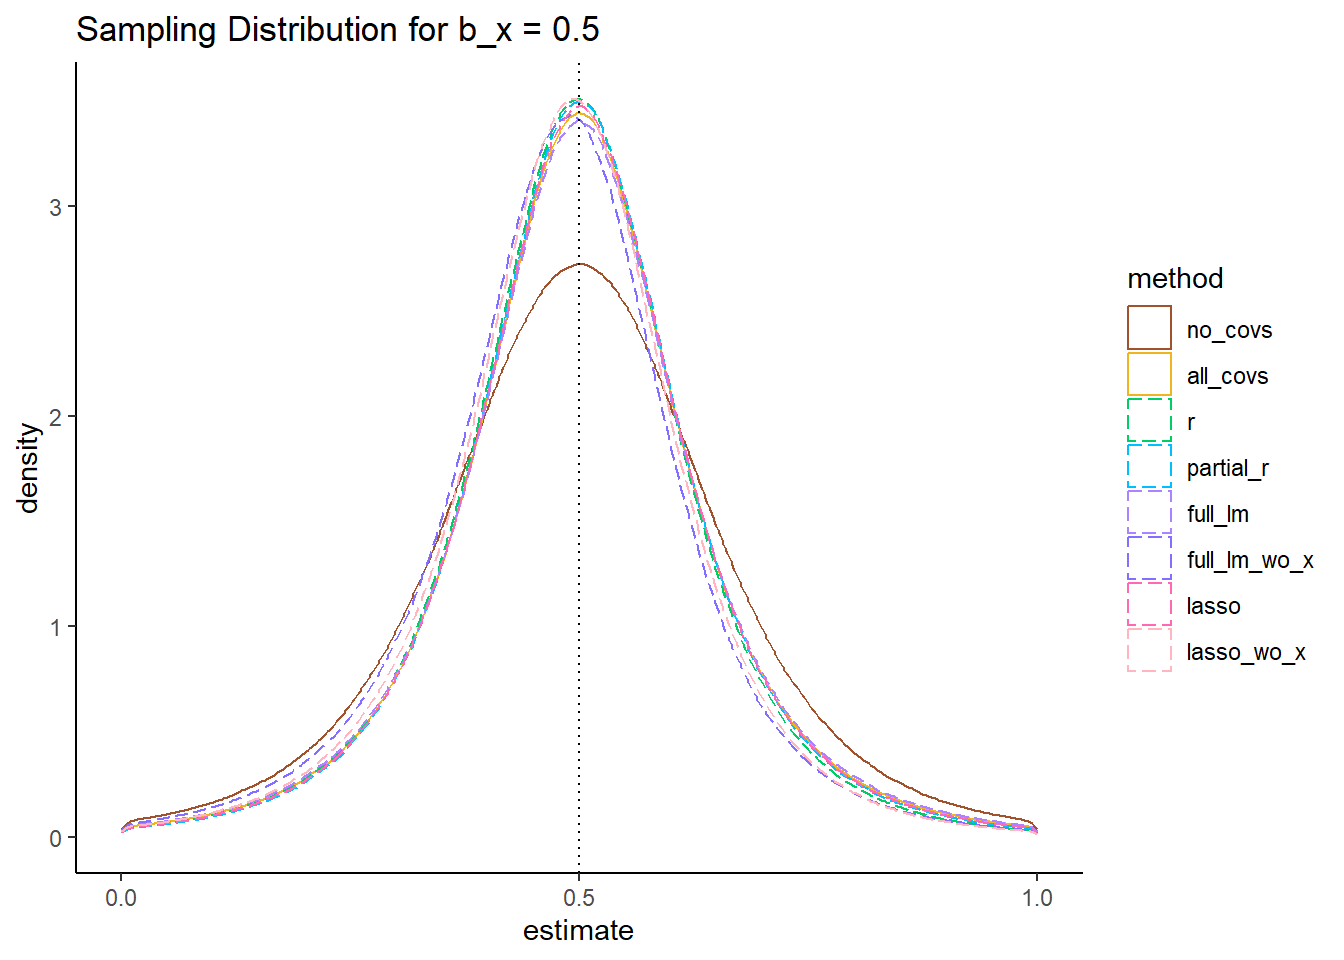

In [ ]:

d_05 |> 
  filter(method != "p_hacked") |> 
  ggplot(aes(x = estimate, color = method, linetype = method)) +
  geom_density(alpha = 0.5) +
  geom_vline(xintercept = 0.5, linetype = "dotted") +
  scale_x_continuous(limits = c(0, 1), breaks = c(0, 0.5, 1)) +
  labs(title = "Sampling Distribution for b_x = 0.5") + 
  scale_linetype_manual(values = method_linetypes) +
  scale_color_manual(values = method_colors)
